In [2]:
!pip install -U veux opensees
#steel01, steel02, concretee02, concrete04


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.4/401.4 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.0

In [22]:
! pip show opensees

Name: opensees
Version: 0.1.17
Summary: Nonlinear finite element analysis.
Home-page: 
Author: 
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, platformdirs, prompt_toolkit, pygments, pyparsing, shps
Required-by: quakeio, sees, veux, xara, xsection


In [3]:
import xara

#import veux
import numpy as np
import matplotlib.pyplot as plt
import opensees.openseespy as ops
from opensees.units.english import ksi, psi, inch, kip

In [23]:

#now model the ten bay system
def create_frame_steel10(material):
  model10 = ops.Model('Basic', '-ndm', 2, ndf=3)

  #Define nodes
  model10.node(1, 0.0*inch, 0.0*inch)
  model10.node(2, 120*inch, 0.0*inch)
  model10.node(3, 240*inch, 0.0*inch)
  model10.node(4, 360*inch, 0.0*inch)
  model10.node(5, 480*inch, 0.0*inch)
  model10.node(6, 600*inch, 0.0*inch)
  model10.node(7, 720*inch, 0.0*inch)
  model10.node(8, 840*inch, 0.0*inch)
  model10.node(9, 960*inch, 0.0*inch)
  model10.node(10, 1080*inch, 0.0*inch)
  model10.node(11, 1200*inch, 0.0*inch)
  model10.node(12, 0.0*inch, 120*inch)
  model10.node(13, 120*inch, 120.0*inch)
  model10.node(14, 240*inch, 120.0*inch)
  model10.node(15, 360*inch, 120.0*inch)
  model10.node(16, 480*inch, 120.0*inch)
  model10.node(17, 600*inch, 120.0*inch)
  model10.node(18, 720*inch, 120.0*inch)
  model10.node(19, 840*inch, 120.0*inch)
  model10.node(20, 960*inch, 120.0*inch)
  model10.node(21, 1080*inch, 120.0*inch)
  model10.node(22, 1200*inch, 120.0*inch)

  #Define Boundary Conditions

  model10.fix(1, (1,1,1))
  model10.fix(2, (1,1,1))
  model10.fix(3, (1,1,1))
  model10.fix(4, (1,1,1))
  model10.fix(5, (1,1,1))
  model10.fix(6, (1,1,1))
  model10.fix(7, (1,1,1))
  model10.fix(8, (1,1,1))
  model10.fix(9, (1,1,1))
  model10.fix(10, (1,1,1))
  model10.fix(11, (1,1,1))

  #Define Geometric Transformation (Linear Transformation)
  model10.geomTransf('PDelta', 2)

  #Define Steel 01 material #with the same strain hardening ratio as steel02 material
  Fy = 50*ksi
  E0 = 29000*ksi
  b = 0.02
  R0 = 20
  R1 = 0.925
  R2 = 0.15
  if material =='Steel01':
    model10.uniaxialMaterial('Steel01', 3, Fy, E0, b)
    mat_tag10=3
  elif material =='Steel02':
    model10.uniaxialMaterial('Steel02', 4, Fy, E0, b, R0, R1, R2)
    mat_tag10=4


  #Define cross-section for nonlinear columns and beam
  side = 4*inch
  area = side**2

  #Define section and assign Steel01 material to fibers in the square section
  model10.section('Fiber', 2)
  model10.fiber((-side/2, -side/2), 0.01, mat_tag10, section=2) #Bottom-left corner fiber (material tag 1)
  model10.fiber((side/2, -side/2),0.01, mat_tag10, section=2) #Bottom-right corner fiber (material tag 1)
  model10.fiber((-side/2, side/2), 0.01, mat_tag10, section=2) #Top left corner fiber (material tag 1)
  model10.fiber((side/2, side/2), 0.01, mat_tag10, section=2) #Top right corner fiber (material tag 1)

  #Define Beam Integration
  model10.beamIntegration('Lobatto', 2, 2, 4) #Integration tag 2, section 2, 4 integration points

  #Define Column Elements (forceBeamColumn) with section tag 2 and transofrmation tag 2
  #element('forceBeamColumn', eleTag, *eleNodes, transfTag, integrationTag, '-iter', maxIter=30, tol=1e-12, '-mass', mass=0.0)
  model10.element('forceBeamColumn', 1, (1,12), 2, 2, '-iter', 30, 1e-12) #column
  model10.element('forceBeamColumn', 2, (2,13), 2, 2, '-iter', 30, 1e-12) #column
  model10.element('forceBeamColumn', 3, (3,14), 2, 2, '-iter', 30, 1e-12) #column
  model10.element('forceBeamColumn', 4, (4,15), 2, 2, '-iter', 30, 1e-12) #column
  model10.element('forceBeamColumn', 5, (5,16), 2, 2, '-iter', 30, 1e-12) #column
  model10.element('forceBeamColumn', 6, (6,17), 2, 2, '-iter', 30, 1e-12) #column
  model10.element('forceBeamColumn', 7, (7,18), 2, 2, '-iter', 30, 1e-12) #column
  model10.element('forceBeamColumn', 8, (8,19), 2, 2, '-iter', 30, 1e-12) #column
  model10.element('forceBeamColumn', 9, (9,20), 2, 2, '-iter', 30, 1e-12) #column
  model10.element('forceBeamColumn', 10, (10,21), 2, 2,'-iter', 30, 1e-12) #column
  model10.element('forceBeamColumn', 11, (11,22), 2, 2, '-iter', 30, 1e-12) #column

  #Define Beam elements (forceBeamColumn) with section tag 2, and transformation tag 2
  model10.element('forceBeamColumn', 12, (12,13), 2, 2, '-iter', 30, 1e-12) #beam
  model10.element('forceBeamColumn', 13, (13,14), 2, 2, '-iter', 30, 1e-12) #beam
  model10.element('forceBeamColumn', 14, (14,15), 2, 2, '-iter', 30, 1e-12) #beam
  model10.element('forceBeamColumn', 15, (15,16), 2, 2, '-iter', 30, 1e-12) #beam
  model10.element('forceBeamColumn', 16, (16,17), 2, 2, '-iter', 30, 1e-12) #beam
  model10.element('forceBeamColumn', 17, (17,18), 2, 2, '-iter', 30, 1e-12) #beam
  model10.element('forceBeamColumn', 18, (18,19), 2, 2, '-iter', 30, 1e-12) #beam
  model10.element('forceBeamColumn', 19, (19,20), 2, 2, '-iter', 30, 1e-12) #beam
  model10.element('forceBeamColumn', 20, (20,21), 2, 2, '-iter', 30, 1e-12) #beam
  model10.element('forceBeamColumn', 21, (21,22), 2, 2, '-iter', 30, 1e-12) #beam

  #Define truss elements
  side_truss10 = 2*inch
  A_truss10 = side_truss10**2
  model10.element('truss', 22, (1,13), A_truss10, mat_tag10)
  model10.element('truss', 23, (2,12), A_truss10, mat_tag10)
  model10.element('truss', 24, (2,14), A_truss10, mat_tag10)
  model10.element('truss', 25, (3,13), A_truss10, mat_tag10)
  model10.element('truss', 26, (3,15), A_truss10, mat_tag10)
  model10.element('truss', 27, (4,14), A_truss10, mat_tag10)
  model10.element('truss', 28, (4,16), A_truss10, mat_tag10)
  model10.element('truss', 29, (5,15), A_truss10, mat_tag10)
  model10.element('truss', 30, (5,17), A_truss10, mat_tag10)
  model10.element('truss', 31, (6,16), A_truss10, mat_tag10)
  model10.element('truss', 32, (6,18), A_truss10, mat_tag10)
  model10.element('truss', 33, (7,17), A_truss10, mat_tag10)
  model10.element('truss', 34, (7,19), A_truss10, mat_tag10)
  model10.element('truss', 35, (8,18), A_truss10, mat_tag10)
  model10.element('truss', 36, (8,20), A_truss10, mat_tag10)
  model10.element('truss', 37, (9,19), A_truss10, mat_tag10)
  model10.element('truss', 38, (9,21), A_truss10, mat_tag10)
  model10.element('truss', 39, (10,20), A_truss10, mat_tag10)
  model10.element('truss', 40, (10,22), A_truss10, mat_tag10)
  model10.element('truss', 41, (11,21), A_truss10, mat_tag10)

  return model10









In [24]:
# render the model
model = create_frame_steel10(material='Steel01')

#veux.render(model)


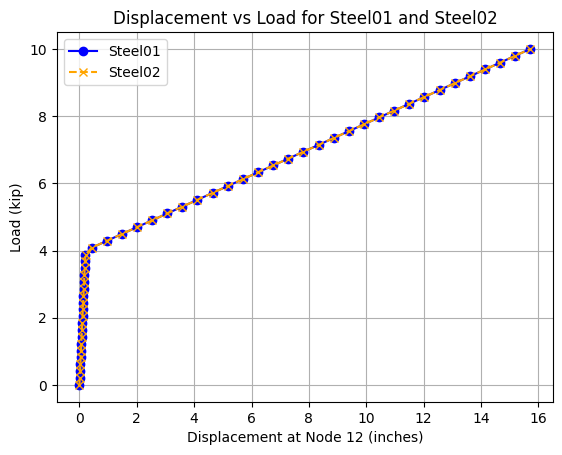

In [26]:

import matplotlib.pyplot as plt
import numpy as np



# Modified uprime function that takes a load as an argument
def uprime(load, material):
    model = create_frame_steel10(material=material)
    model.pattern("Plain", 2, "Linear")
    model.load(12, load, 0, 0)
    model.algorithm("Newton")
    model.integrator("LoadControl", 1)
    model.analysis("Static")
    model.analyze(1)
    return model.nodeDisp(12, 1)

# Generate 50 loads from 0 to 4 kips
loads_kip = np.linspace(0, 10, 50)
loads = [l * kip for l in loads_kip]  # Convert to internal units


# Define materials and their styles
material_styles = {
    'Steel01': {'color': 'blue', 'linestyle': '-', 'marker': 'o'},
    'Steel02': {'color': 'orange', 'linestyle': '--', 'marker': 'x'}
}

# Plot for both materials
for material, style in material_styles.items():
    displacements = []
    for load in loads:
        u = uprime(load, material)
        displacements.append(u)
    plt.plot(displacements, loads_kip,
             label=material,
             color=style['color'],
             linestyle=style['linestyle'],
             marker=style['marker'])

# Add labels and legend
plt.xlabel('Displacement at Node 12 (inches)')
plt.ylabel('Load (kip)')
plt.title('Displacement vs Load for Steel01 and Steel02')
plt.legend()
plt.grid(True)
plt.show()


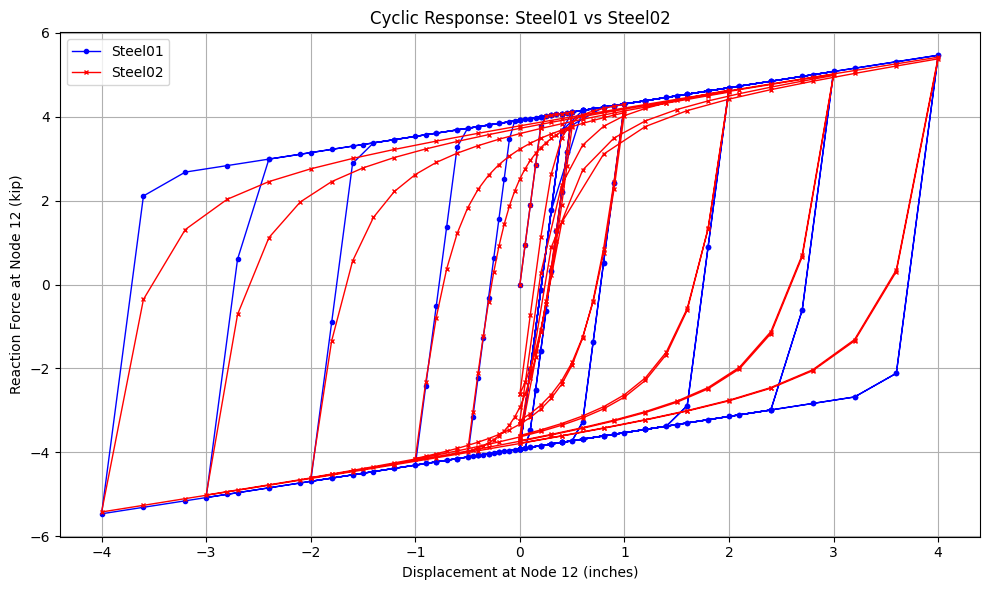

In [27]:
# Your existing model creation function should be defined here
# (Assuming you've already pasted the corrected `create_frame_2_steel(material)`)

# Generate a richer displacement history
def generate_history(max_disp=4.0*inch, steps_per_cycle=10):
    disp_inch = []
    for amp in [0.5*inch, 1.0*inch, 2.0*inch, 3.0*inch, max_disp]:
        step = amp / steps_per_cycle
        cycle = (
            list(np.arange(0, amp + step, step)) +
            list(np.arange(amp - step, -amp - step, -step)) +
            list(np.arange(-amp + step, amp + step, step)) +
            list(np.arange(amp - step, 0 - step, -step))
)
        disp_inch.extend(cycle)
    return disp_inch

# Updated analysis function
def analyze_history_displacement(model, displacement_history, dof=1):
    u_displacement_history = []
    force_displacement_history = []

    model.constraints("Plain")
    model.numberer("Plain")
    model.system("BandGeneral")
    model.test("NormUnbalance", 1e-6, 10)
    model.algorithm("Newton")
    model.analysis("Static")

    current_disp = 0.0
    for target_disp in displacement_history:
        disp_increment = target_disp - current_disp
        model.integrator("DisplacementControl", 12, dof, disp_increment)
        ok = model.analyze(1)
        if ok != 0:
            print(f"Step failed at target {target_disp:.3f} inches")
            break
        u = model.nodeDisp(12, dof)
        r = model.getTime()
        u_displacement_history.append(u)
        force_displacement_history.append(r)
        current_disp = target_disp

    return u_displacement_history, force_displacement_history


ops.wipe()


model_steel01 = create_frame_steel10(material='Steel01')
model_steel01.pattern("Plain", 3, "Linear")
model_steel01.load(12, 1 * kip, 0, 0)

history = generate_history()
u01, f01 = analyze_history_displacement(model_steel01, history)

# Run for Steel02
ops.wipe()
model_steel02 = create_frame_steel10('Steel02')
model_steel02.pattern("Plain", 3, "Linear")
model_steel02.load(12, 1 * kip, 0, 0)

u02, f02 = analyze_history_displacement(model_steel02, history)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(u01, f01, label='Steel01', color='blue', marker='o', markersize=3, linewidth=1)
plt.plot(u02, f02, label='Steel02', color='red', marker='x', markersize=3, linewidth=1)
plt.xlabel('Displacement at Node 12 (inches)')
plt.ylabel('Reaction Force at Node 12 (kip)')
plt.title('Cyclic Response: Steel01 vs Steel02')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()